In [1]:
#Import the required libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing


In [2]:
train_data = pd.read_csv('../notebook/cleaned_data_for_regression.csv')
test_data = pd.read_csv('../notebook/cleaned_test_data.csv')

In [3]:
train_data.head()

,Unnamed: 0,amount_donated,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,0.0,5,101,87.0,0,X,5,54,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,2,0.0,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,3,0.0,38,92,60.0,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,4,0.0,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [4]:
test_data

,Unnamed: 0,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,139,101,59.0,0,R,2,46,U,F,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,1,142,137,59.0,0,R,2,43,U,F,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,2,282,17,30.0,0,T,1,35,H,M,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,3,368,137,75.0,0,U,1,2,H,M,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,4,387,5,59.0,0,T,2,40,U,F,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,2143,190842,101,47.0,1,C,1,24,U,F,...,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,2144,191056,41,17.0,1,U,1,1,U,M,...,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,2145,191164,89,55.0,0,X,5,54,U,F,...,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,2146,191484,65,42.0,1,X,5,54,U,F,...,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1


In [5]:
def drop_column(column_name, data):
    dropped_data = data.drop([column_name], axis = 1) 
    return dropped_data

In [6]:
train_control_no = train_data.control_number
train_data = drop_column('control_number',train_data)
test_control_no = test_data.control_number
test_data = drop_column('control_number',test_data)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   19372 non-null  int64  
 1   amount_donated               19372 non-null  float64
 2   months_since_origin          19372 non-null  int64  
 3   donor_age                    19372 non-null  float64
 4   in_house                     19372 non-null  int64  
 5   urbanicity                   19372 non-null  object 
 6   ses                          19372 non-null  int64  
 7   cluster_code                 19372 non-null  int64  
 8   home_owner                   19372 non-null  object 
 9   donor_gender                 19372 non-null  object 
 10  income_group                 19372 non-null  float64
 11  published_phone              19372 non-null  int64  
 12  overlay_source               19372 non-null  object 
 13  mor_hit_rate    

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2148 non-null   int64  
 1   months_since_origin          2148 non-null   int64  
 2   donor_age                    2148 non-null   float64
 3   in_house                     2148 non-null   int64  
 4   urbanicity                   2148 non-null   object 
 5   ses                          2148 non-null   int64  
 6   cluster_code                 2148 non-null   int64  
 7   home_owner                   2148 non-null   object 
 8   donor_gender                 2148 non-null   object 
 9   income_group                 2148 non-null   float64
 10  published_phone              2148 non-null   int64  
 11  overlay_source               2148 non-null   object 
 12  mor_hit_rate                 2148 non-null   int64  
 13  wealth_rating     

In [9]:
train_data.drop("Unnamed: 0", axis=1, inplace=True)
test_data.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
train_data.shape, test_data.shape

((19372, 48), (2148, 47))

In [11]:
train_data = train_data[train_data.amount_donated != 0.00]

In [12]:
# Selecting the independent variables and the target variable
#
y = train_data['amount_donated']
X = train_data.drop('amount_donated', axis = 1)


* **Joining the Train and Test data to encode the categorical columns together**

In [13]:
total_data = pd.concat([X, test_data])

In [14]:
df_numerical = total_data.select_dtypes(include = [np.number])

In [15]:
df_categorical = total_data.select_dtypes(include = [object])

In [16]:
df_categorical = df_categorical.apply(lambda x: x.astype('category'))

In [17]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 1 to 2147
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   urbanicity           6991 non-null   category
 1   home_owner           6991 non-null   category
 2   donor_gender         6991 non-null   category
 3   overlay_source       6991 non-null   category
 4   recency_status_96nk  6991 non-null   category
dtypes: category(5)
memory usage: 89.5 KB


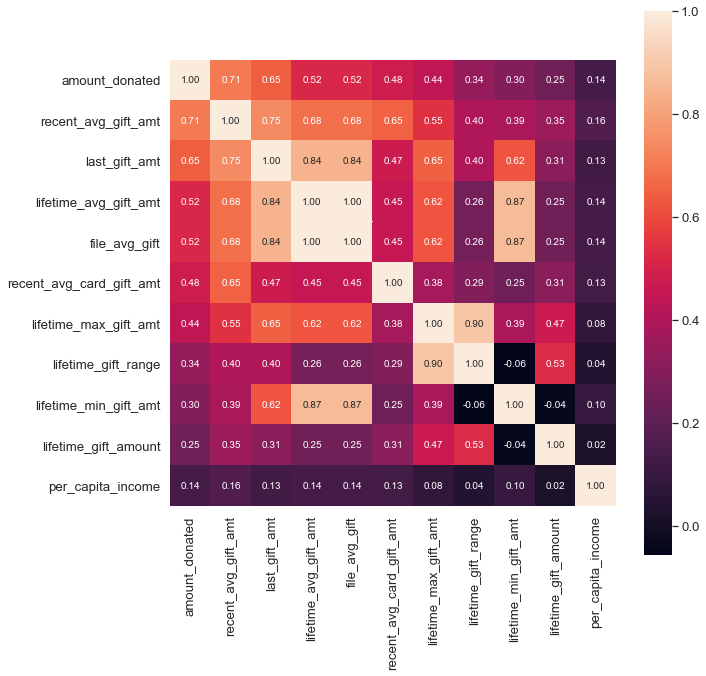

In [18]:
corrmatrix = train_data.corr()
k = 11 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'amount_donated')['amount_donated'].index
cm = np.corrcoef(train_data[cols].values.T)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

In [19]:
train_data.shape

(4843, 48)

In [20]:
train_data.columns.to_list()

['amount_donated',
 'months_since_origin',
 'donor_age',
 'in_house',
 'urbanicity',
 'ses',
 'cluster_code',
 'home_owner',
 'donor_gender',
 'income_group',
 'published_phone',
 'overlay_source',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'recency_status_96nk',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_g

In [21]:
df_categorical.shape

(6991, 5)

In [22]:
df_categorical.head()

,urbanicity,home_owner,donor_gender,overlay_source,recency_status_96nk
1,R,H,M,P,S
7,C,H,F,P,A
9,R,H,F,B,S
14,R,U,F,M,S
16,R,U,M,B,A


In [23]:

total_data=pd.get_dummies(total_data,drop_first=True)

In [25]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
7,89,79.0,0,2,28,1.0,0,0,5.0,1004,...,0,0,0,0,1,0,0,0,0,0
9,101,63.0,0,2,43,4.0,1,0,5.0,399,...,0,0,0,0,0,0,0,0,0,1
14,137,60.0,0,2,43,5.0,1,0,1.0,475,...,1,0,0,1,0,0,0,0,0,1
16,77,81.0,0,2,45,4.0,1,24,3.0,530,...,1,1,0,0,0,0,0,0,0,0


In [24]:
total_data.shape

(6991, 57)

In [26]:
total_data.columns.to_list()

['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',

In [28]:
total_data[['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',
 'home_owner_U',
 'donor_gender_M',
 'donor_gender_U',
 'overlay_source_M',
 'overlay_source_P',
 'recency_status_96nk_E',
 'recency_status_96nk_F',
 'recency_status_96nk_L',
 'recency_status_96nk_N',
 'recency_status_96nk_S']] = StandardScaler().fit_transform(total_data[['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',
 'home_owner_U',
 'donor_gender_M',
 'donor_gender_U',
 'overlay_source_M',
 'overlay_source_P',
 'recency_status_96nk_E',
 'recency_status_96nk_F',
 'recency_status_96nk_L',
 'recency_status_96nk_N',
 'recency_status_96nk_S']])

In [29]:
total_data.shape

(6991, 57)

In [35]:
independent_variables = ['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',
 'home_owner_U',
 'donor_gender_M',
 'donor_gender_U',
 'overlay_source_M',
 'overlay_source_P',
 'recency_status_96nk_E',
 'recency_status_96nk_F',
 'recency_status_96nk_L',
 'recency_status_96nk_N',
 'recency_status_96nk_S']

#### Split the data into test and train data sets
It is extremely important to split the data into train and test sets. Train set is used to train the model and Test set is used to test the performance of the model.

Problems encountered if train test split not performed:

It does not make sense to talk about the performance of the model by testing it on same data. The model learns the data pretty well and when tested on same data will produce the best score.
The model becomes very specific to the training data, so far as they even get trained on the ocassional erroneous labels present in the training data. This results in Overfitting and the model might not work well outside the training data.
Therefore it is advised to keep a certian portion of the data aside (test set) untouched and test our model on this data to evaluate the true performance of the model.



In [32]:
X =  total_data.iloc[:4843]
X_test_cat_encoded =  total_data.iloc[4843:]
X.shape, X_test_cat_encoded.shape, y.shape

((4843, 57), (2148, 57), (4843,))

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 57)
(1453, 57)
(3390,)
(1453,)


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
thresh = 10
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) 
    for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break
print ('Final variables:', independent_variables)


C:\Users\kwentua\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif : [38.72012904170162, 1.1289949301526168, 1.9135243085573304, 8.671876985655876, 107.3661537641075, 1.3656807249703704, 1.4096599377355576, 1.1629847269813092, 1.4951143193706906, 2.9823829988531454, 6.397911611266793, 2.033067636040475, 4.324329358797068, 1.0697233634162453, 1.7434051292247879, 1.7426970963431163, 2.1318838517170136, 2.0465281650536866, 1.359208793395402, 3.2962539040648133, 14.591634781379021, 4.535472829712782, 13.170678564730963, 2.304178109356733, 20.51466996934312, 17.3754298316016, 2.1142421543104155, 37.425854669475804, 36.15052801717106, 5.150392826200677, 13.907495350170723, inf, inf, inf, inf, 4.955355282988145, 4.902436743951674, 7.483360139685715, 3.0649578821826244, 38.749275690123596, inf, 14.233224586455798, 30.44076657507251, 11.107788460777114, 11.641504396380368, 26.380893205755868, 5.647822387020782, 1.8564021490798517, 1.0698734729429429, 1.0971910361029065, 2.2717319070158584, 1.558412940638836, 1.9019319880988415, 1.9046632658465084, 1.028376

* **We can notice that VIF analysis has elemenated several features**.
* **Let’s run the first iteration of multivariate regression model with the set of independent variables that has passed the VIF analysis.**

In [ ]:
independent_variables =  ['months_since_origin', 'donor_age', 'in_house', 'ses', 'income_group', 'published_phone', 
'mor_hit_rate', 'wealth_rating', 'median_home_value', 'median_household_income', 'pct_owner_occupied', 'per_capita_income', 
'pct_attribute1', 'pct_attribute2', 'pct_attribute3', 'pct_attribute4', 'pep_star', 'recent_star_status', 'frequency_status_97nk', 
'recent_response_prop', 'recent_avg_gift_amt', 'recent_card_response_prop', 'recent_avg_card_gift_amt', 'recent_card_response_count', 
'months_since_last_prom_resp', 'lifetime_gift_amount', 'lifetime_gift_count', 'lifetime_max_gift_amt', 'lifetime_min_gift_amt', 
'last_gift_amt', 'card_prom_12', 'number_prom_12', 'months_since_last_gift', 'urbanicity_R', 'urbanicity_S', 'urbanicity_T', 
'urbanicity_U', 'urbanicity_X', 'home_owner_U', 'donor_gender_M', 'donor_gender_U', 'overlay_source_M', 'overlay_source_P', 
'recency_status_96nk_E', 'recency_status_96nk_F', 'recency_status_96nk_L', 'recency_status_96nk_N', 'recency_status_96nk_S']
# use the list to select a subset from original DataFrame
X = X[independent_variables]
y = df['price']
